In [19]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

1. Data pre-processing

In [4]:
df = pd.read_csv("earthquake.csv")

In [5]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [6]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [7]:
df.set_index('id')
df = df.drop('country',axis = 1)

In [8]:
df.isnull().sum()

id               0
date             0
time             0
lat              0
long             0
city         12253
area         11030
direction    13945
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

id           0
date         0
time         0
lat          0
long         0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
dtype: int64

In [10]:
df.columns

Index(['id', 'date', 'time', 'lat', 'long', 'city', 'area', 'direction',
       'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

In [11]:
df.dtypes

id           float64
date          object
time          object
lat          float64
long         float64
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['date']= label_encoder.fit_transform(df['date'])
df['time']= label_encoder.fit_transform(df['time'])
df['city']= label_encoder.fit_transform(df['city'])
df['area']= label_encoder.fit_transform(df['area'])
df['direction']= label_encoder.fit_transform(df['direction'])
df.dtypes

id           float64
date           int64
time           int64
lat          float64
long         float64
city           int64
area           int64
direction      int64
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [13]:
df.describe()

,id,date,time,lat,long,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
count,1.726000e+03,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,1.975591e+13,635.169757,658.289687,38.942138,32.949757,37.282155,631.375435,3.768830,3.052028,23.759212,4.694786,3.264368,4.411472,4.590498,3.254403,3.316107
std,3.093094e+11,342.056449,383.006245,1.247153,5.555632,21.410191,362.717053,1.929596,4.184812,21.065066,0.666930,2.227951,0.887299,0.916074,2.232994,2.212173
min,1.910000e+13,0.000000,0.000000,35.990000,25.740000,0.000000,0.000000,0.000000,0.100000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.960000e+13,360.250000,327.250000,38.000000,28.800000,19.000000,317.250000,2.000000,1.300000,9.500000,4.300000,0.000000,4.100000,4.200000,0.000000,0.000000
50%,1.970000e+13,630.000000,658.500000,39.000000,30.140000,39.000000,641.500000,3.000000,2.300000,15.000000,4.700000,4.450000,4.500000,4.700000,4.400000,4.500000
75%,2.010000e+13,926.750000,989.750000,39.740000,38.240000,53.000000,941.750000,6.000000,3.600000,33.000000,5.100000,4.800000,4.900000,5.100000,4.800000,4.900000
max,2.020000e+13,1209.000000,1318.000000,42.600000,45.000000,75.000000,1259.000000,7.000000,81.600000,172.000000,7.900000,7.200000,7.200000,7.700000,7.900000,7.100000


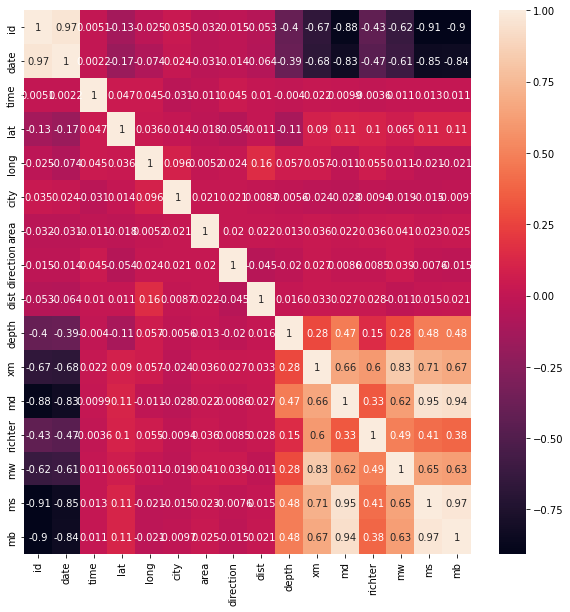

In [14]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(data = cor, annot =True)

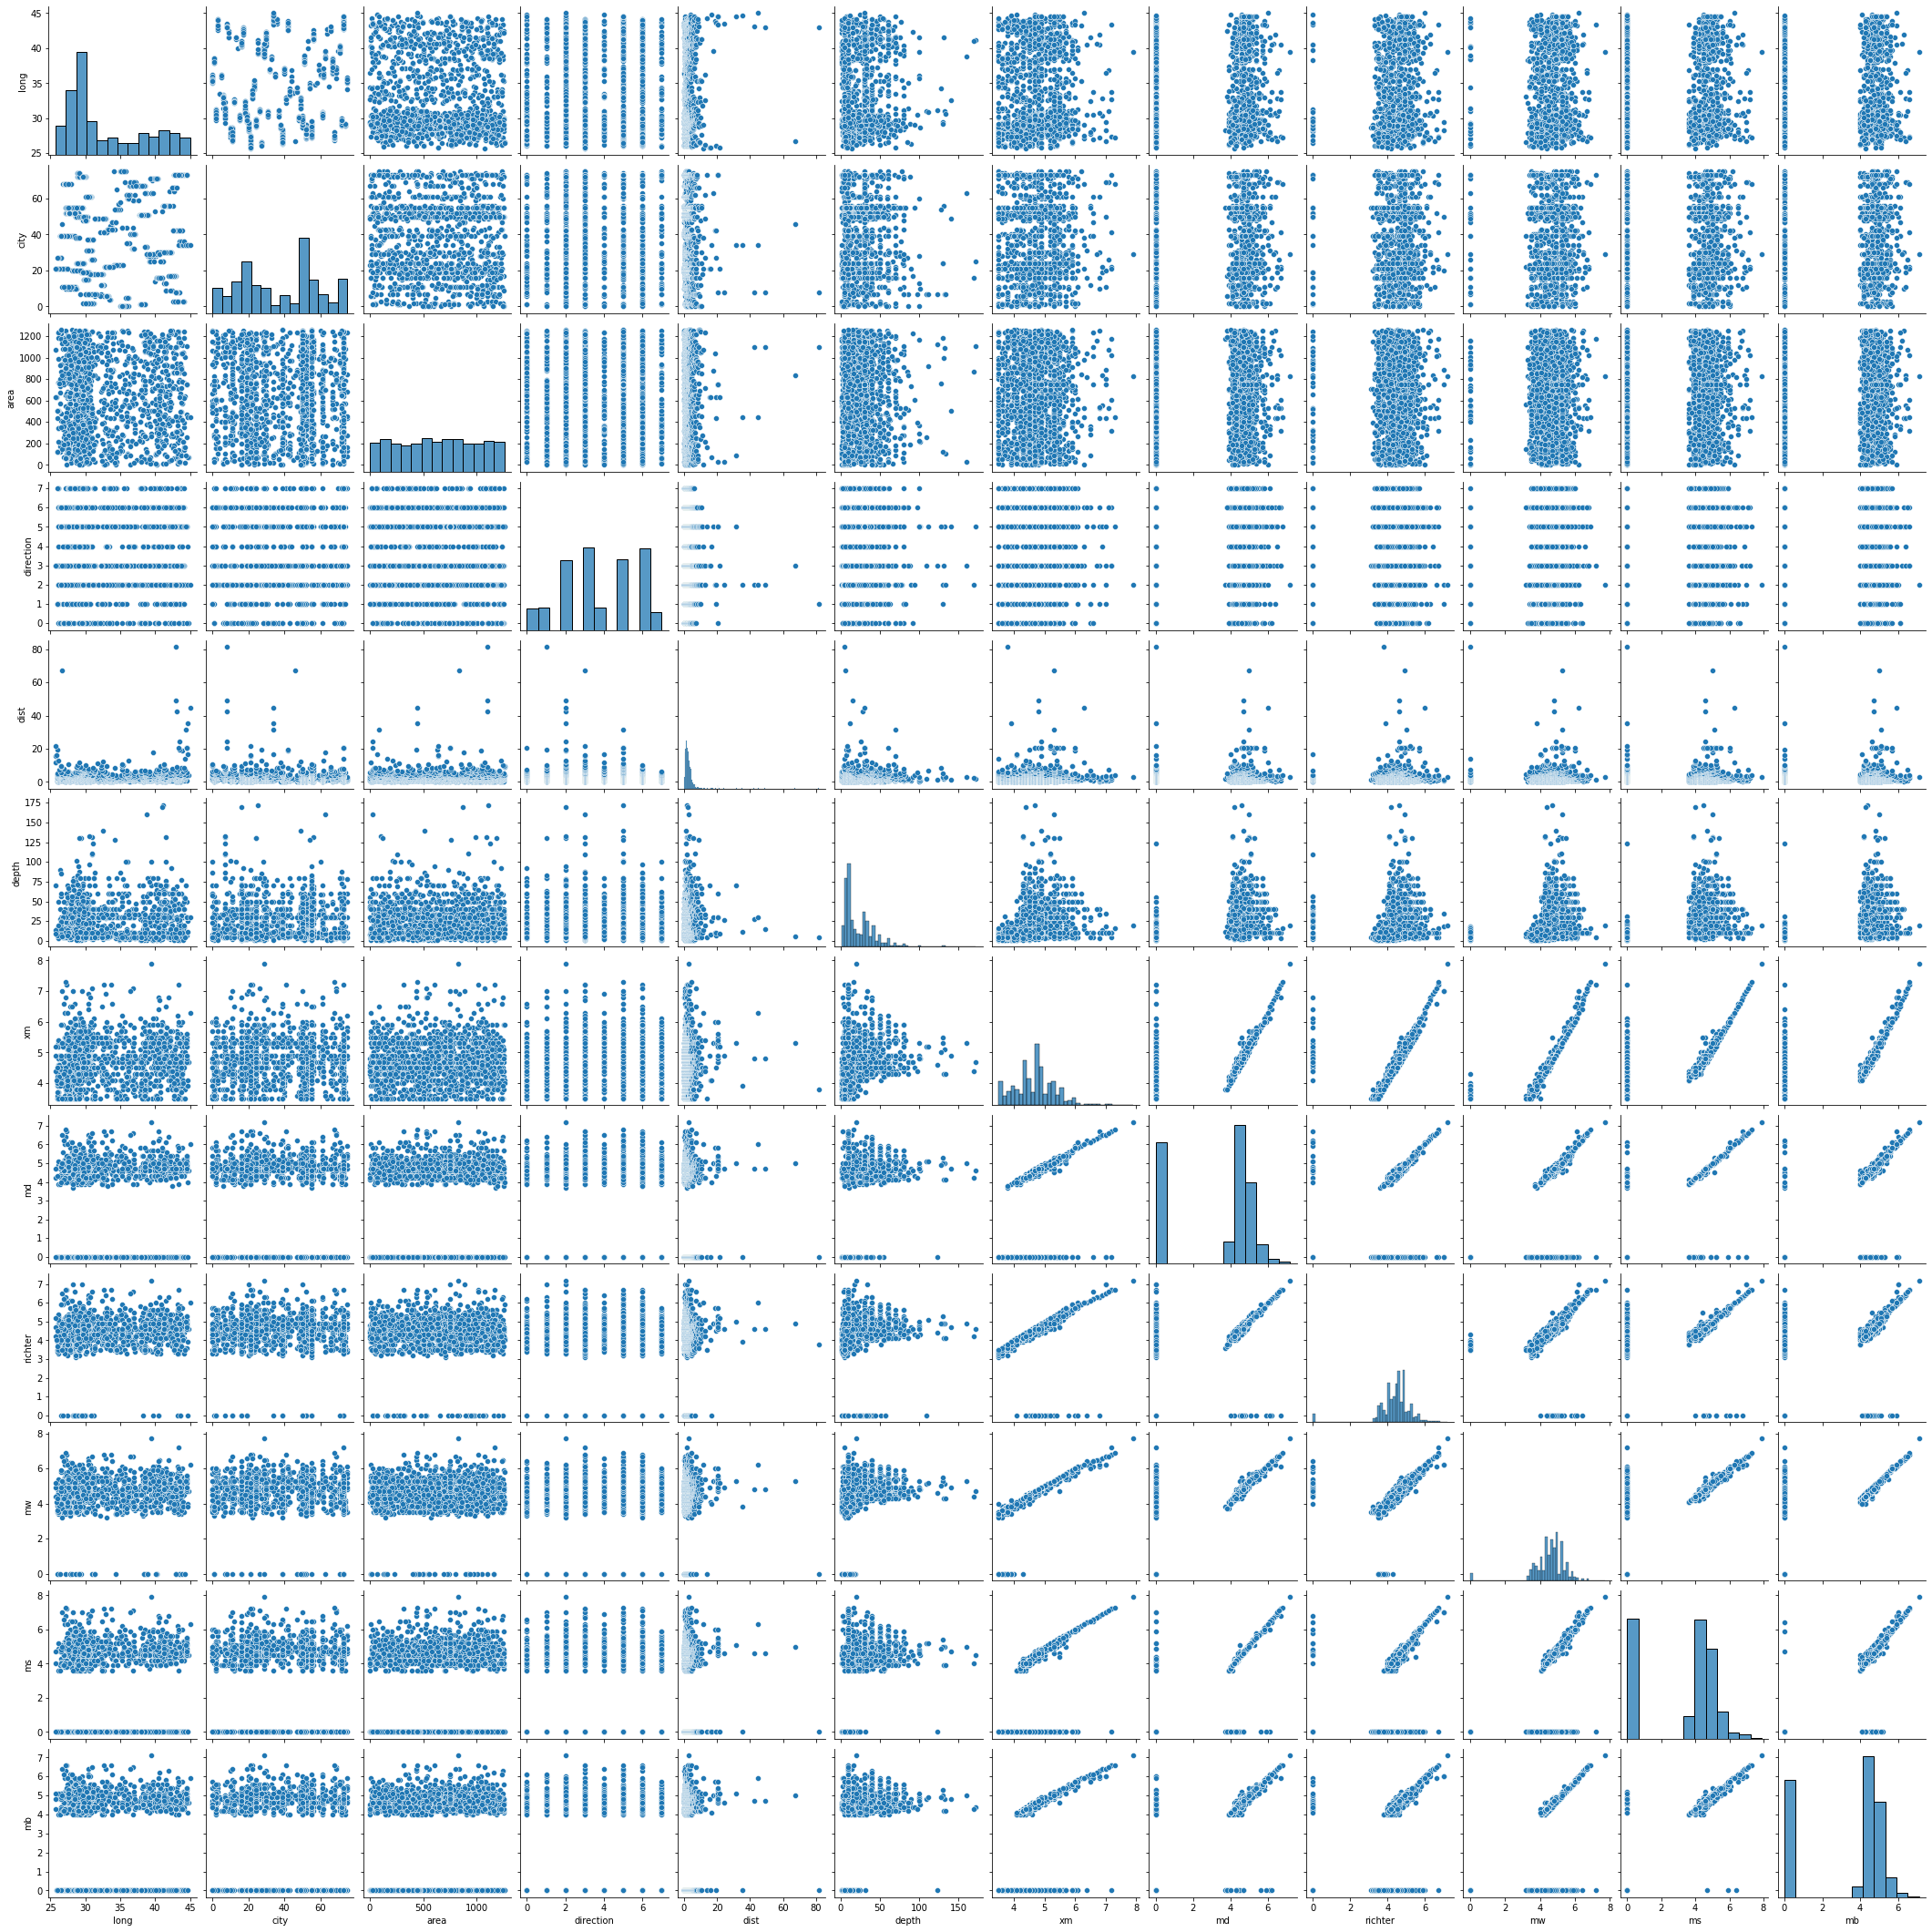

In [24]:
sns.pairplot(df.iloc[:, 4:])

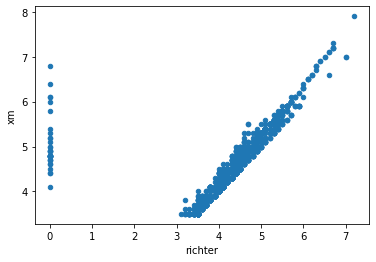

In [17]:
df.plot.scatter("richter","xm")

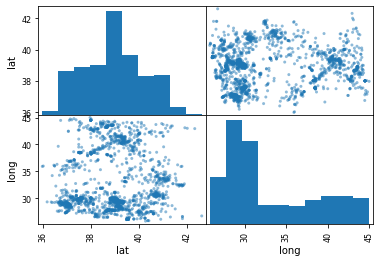

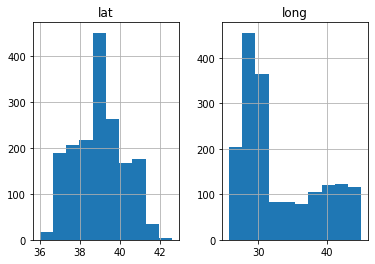

In [20]:
scatter_matrix(df[['lat','long']]) #scatter plot
plt.show()
df[['lat','long']].hist() #histogram
print("\n")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


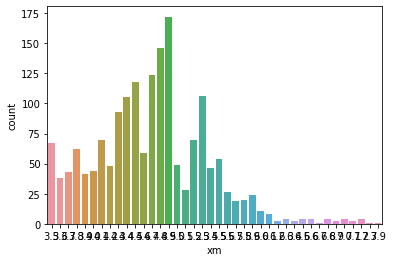

In [22]:
sns.countplot(df.xm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


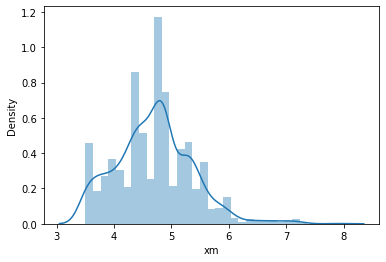

In [23]:
sns.distplot(df.xm)

In [25]:
y=np.array(df['xm']) 
X=np.array(df.drop('xm',axis=1))

In [26]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) 

In [30]:
from sklearn.linear_model import LinearRegression  
linear=LinearRegression() 
linear.fit(X_train,y_train) 
ans = linear.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, ans))

0.19454804936682235


In [31]:
data=linear.score(X_test,y_test) 
print(data)

0.7938500044442136


In [32]:
data=linear.score(X_train,y_train)
print(data)

0.8005442908682926


Text(0, 0.5, 'Predicted Magnitude')

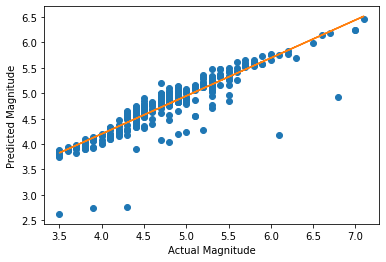

In [33]:
plt.plot(y_test, ans, 'o') 
m, b = np.polyfit(y_test,ans, 1) 
plt.plot(y_test, m*y_test + b) 
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")